$$
\Huge MVL_{Canolty} = \left|\frac{\sum_{j=1}^n a_{u} e^{i(\phi_{l})}}{n}\right|
$$

$$\large n= \small \text{the total number of data points} $$
$$\large \phi_{l}  =\small \text{the phase angle of the lower frequency band at data point t} $$
$$\large a_{u} =\small \text{the phase angle of the upper frequency band amplitude time series} $$


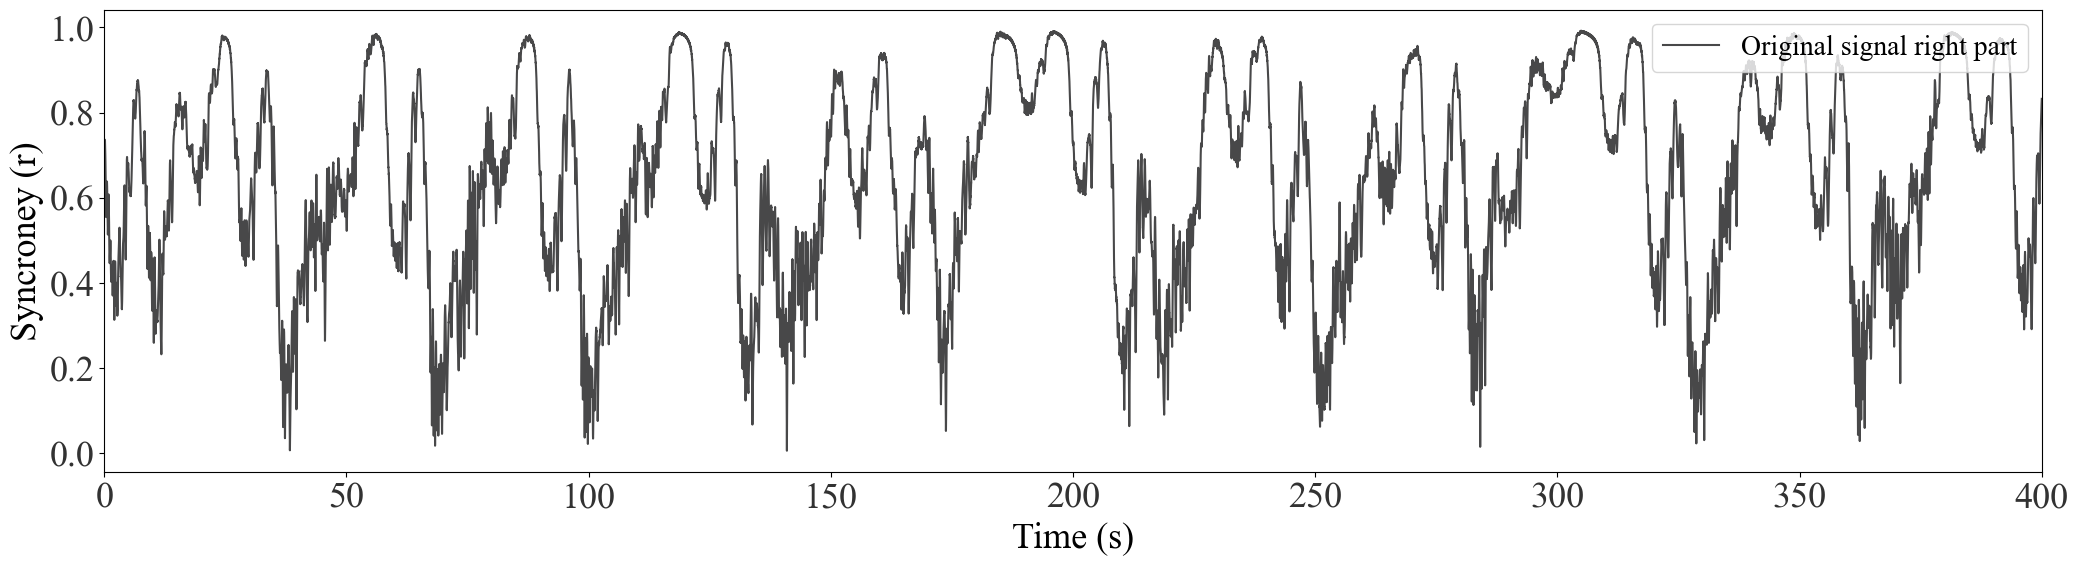

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.pyplot import figure
from scipy.signal import hilbert
import math
import cmath



font1 = {'family': 'Times New Roman', 'color': '#000000'}
font2 = {'family': 'Times New Roman', 'color': '#003acc'}
font3 = {'family': 'Times New Roman', 'color': '#b43636'}


dataset = np.genfromtxt(fname='right_sync.txt',skip_header=0)
time_signal = dataset[:,0]
signal = dataset[:,1]
signal_shift=signal
t = np.linspace(time_signal[0], 10, len(time_signal))
time = np.linspace(time_signal[0], time_signal[-1],len(time_signal))

# Compute the Fourier Transform
freq = np.fft.fftfreq(len(signal_shift), t[1]-t[0])
ft = np.fft.fft(signal_shift)
freq=freq*1.89

figure(num=None, figsize=(25, 6))
plt.subplot(1, 1, 1)
plt.plot(time, signal_shift, '#484849', label='Original signal right part')
plt.ylabel('Syncroney (r)', fontdict=font1, fontsize=26)
plt.xlabel('Time (s)', fontdict=font1, fontsize=26)
plt.xlim(0, 400)
plt.xticks(font='Times New Roman',fontsize=26, color='#323232')
plt.yticks(font='Times New Roman',fontsize=26, color='#323232')
plt.legend(loc="upper right",prop={'family': 'Times New Roman',  "size": 20 })


In [ ]:

Min_freq_A=[0,0,0,0,    4,4,4,     8,8,   13]
Max_freq_A=[4,4,4,4,    8,8,8,     13,13, 30]
name_freq_A=['delta','delta','delta','delta',   'theta','theta','theta',      'alpha','alpha',   'beta']


Min_freq_B=[4,8,13,30,  8,13,30    ,13,30,   30,]
Max_freq_B=[8,13,30,45  ,13,30,45   ,30,45     ,45]
name_freq_B=['theta','alpha','beta','gamma',   'alpha','beta','gamma',    'beta','gamma',     'gamma',]
fig = plt.figure(figsize=(35, 30))

#loop=6
for loop in range (0,10):
    #______________________________________________________filter      _A
    freq_min_A = Min_freq_A[loop]  # Hz
    freq_max_A = Max_freq_A[loop]  # Hz
    filter_A = np.logical_or(freq < freq_min_A, freq > freq_max_A)
    fft_vals_filtered_A = ft.copy()
    fft_vals_filtered_A[filter_A] = 0
    signal_filtered_A = np.real(np.fft.ifft(fft_vals_filtered_A))
    #______________________________________________________filter      _B
    freq_min_B = Min_freq_B[loop]  # Hz
    freq_max_B = Max_freq_B[loop]  # Hz
    filter_B = np.logical_or(freq < freq_min_B, freq > freq_max_B)
    fft_vals_filtered_B = ft.copy()
    fft_vals_filtered_B[filter_B] = 0
    signal_filtered_B = np.real(np.fft.ifft(fft_vals_filtered_B))



    phase_A = np.angle(hilbert(signal_filtered_A))
    amps_B = np.abs(hilbert(signal_filtered_B))#SATR
    MVL=0
    for i in range(0,len(phase_A)):
        MVL=MVL+amps_B[i]*cmath.exp(1j*phase_A[i])
    MVL=MVL/len(phase_A)
    phase=np.angle(np.abs(MVL)) # output the result
    amps=np.abs(np.abs(MVL)) # output the result


    ax=plt.subplot(5, 5, loop+1,projection="polar")
    ax.scatter(phase_A,amps_B/max(amps_B),alpha=0.05, color='k')
    ax.scatter(phase,amps/max(amps_B),alpha=1, color='r')
    ax.set_ylim(0, 1)
    name='('+name_freq_A[loop]+' & '+name_freq_B[loop]+')'
    ax.set_title(name, fontdict=font2, fontsize=30)
    
plt.suptitle('MVL (Canolty) for Right part' , fontdict=font3, fontsize=60)

plt.subplots_adjust(top = 0.92, bottom=0.09, hspace=0.37, wspace=0.34)
plt.savefig('MVL/MVL_Canolty.png', dpi=300)


In [ ]:
from PIL import Image

# Open the PNG image and get its width and height
img = Image.open('MVL/MVL_CCanolty.png')
width, height = img.size

# Set the coordinates for the crop region
left = 1250
top = 0
right = width-1000
bottom = height - 5200

# Crop the image using the coordinates
cropped_img = img.crop((left, top, right, bottom))

# Save the cropped image as a new PNG file
cropped_img.save('MVL/MVL_Canolty_example.png')

## single plot

In [ ]:
loop=5
#______________________________________________________filter      _A
freq_min_A = Min_freq_A[loop]  # Hz
freq_max_A = Max_freq_A[loop]  # Hz
filter_A = np.logical_or(freq < freq_min_A, freq > freq_max_A)
fft_vals_filtered_A = ft.copy()
fft_vals_filtered_A[filter_A] = 0
signal_filtered_A = np.real(np.fft.ifft(fft_vals_filtered_A))
#______________________________________________________filter      _B
freq_min_B = Min_freq_B[loop]  # Hz
freq_max_B = Max_freq_B[loop]  # Hz
filter_B = np.logical_or(freq < freq_min_B, freq > freq_max_B)
fft_vals_filtered_B = ft.copy()
fft_vals_filtered_B[filter_B] = 0
signal_filtered_B = np.real(np.fft.ifft(fft_vals_filtered_B))



phase_A = np.angle(hilbert(signal_filtered_A))
amps_B = np.abs(hilbert(signal_filtered_B))#SATR
MVL=0
for i in range(0,len(phase_A)):
    MVL=MVL+amps_B[i]*cmath.exp(1j*phase_A[i])
MVL=MVL/len(phase_A)
phase=np.angle(np.abs(MVL)) # output the result
amps=np.abs(np.abs(MVL)) # output the result


fig = plt.figure(figsize=(10, 11))
ax=plt.subplot(projection="polar")
ax.scatter(phase_A,amps_B/max(amps_B),alpha=0.05, color='k')
ax.scatter(phase,amps/max(amps_B),alpha=1, color='r')
ax.set_ylim(0, 1)
name='MVL_Canolty ('+name_freq_A[loop]+' & '+name_freq_B[loop]+')'
ax.set_title(name, fontdict=font2, fontsize=30)